***Задание 1***

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization




(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))


test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Точність на тестових даних: {test_accuracy:.4f}")

***Задание 2***

In [10]:
import gzip
import numpy as np
import os
train_images_path = "/kaggle/input/fashionmnist/train-images-idx3-ubyte"
train_labels_path = "/kaggle/input/fashionmnist/train-labels-idx1-ubyte"
test_images_path = "/kaggle/input/fashionmnist/t10k-images-idx3-ubyte"
test_labels_path = "/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte"


In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [50]:
with open(train_images_path, "rb") as f:
    x_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(60000, 28,28,1)
with open(train_labels_path, "rb") as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
with open (test_images_path, "rb") as f:
    x_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(10000,28,28,1)
with open(test_labels_path, "rb") as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Додавання додаткового виміру для зображень
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [32]:
weights_path = '/kaggle/input/vgg16weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [58]:
from keras import models, layers

In [78]:
weights_path = '/kaggle/input/vgg16weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Заморожуємо шари базової моделі

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(10, activation ='softmax')
                                             
])



In [89]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test)
)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 188s 99ms/step - accuracy: 0.8893 - loss: 0.3026 - val_accuracy: 0.8961 - val_loss: 0.2878
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 187s 100ms/step - accuracy: 0.9104 - loss: 0.2466 - val_accuracy: 0.9039 - val_loss: 0.2704
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 187s 100ms/step - accuracy: 0.9200 - loss: 0.2238 - val_accuracy: 0.9119 - val_loss: 0.2547
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 185s 99ms/step - accuracy: 0.9251 - loss: 0.2063 - val_accuracy: 0.9124 - val_loss: 0.2506
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 99ms/step - accuracy: 0.9316 - loss: 0.1891 - val_accuracy: 0.9037 - val_loss: 0.2696
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 99ms/step - accuracy: 0.9361 - loss: 0.1778 - val_accuracy: 0.9121 - val_loss: 0.2466
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 186s 99ms/step - accuracy: 0.9402 - loss: 0.1637 - val_accuracy: 0.9168 - val_loss: 0.2399
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 100ms/step - accurac

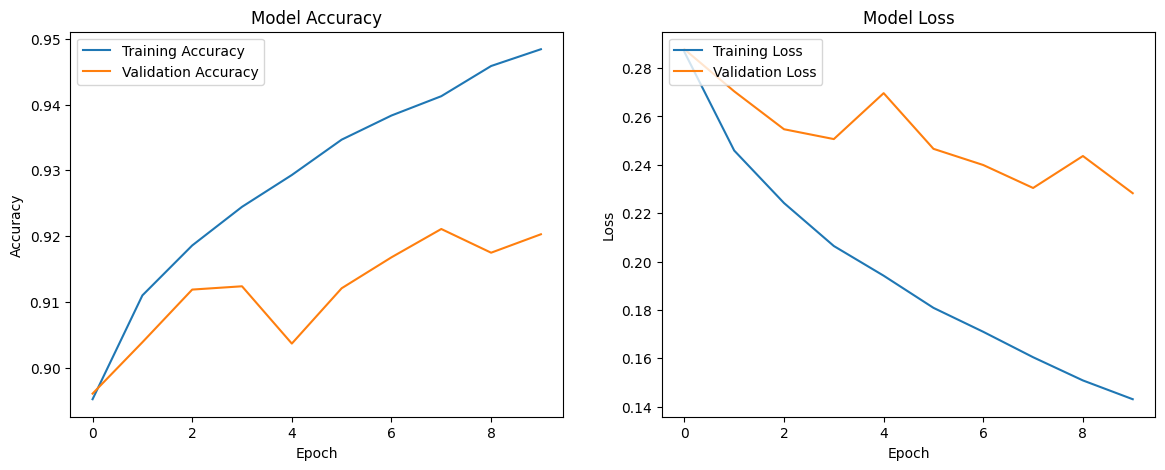

In [90]:
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

In [91]:
print("Available keys in history:", history.history.keys())

Available keys in history: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


***Висновок:***
*Згорткова нейронна мережа з основою VGG16, в моєму випадку, забезпечує вищу точність, оскільки вона використовує глибшу архітектуру, оптимізовану для виділення складних ознак. Однак вона вимагає більше ресурсів для обчислень і може переобучуватися. Проста CNN без VGG16 є хорошим компромісом між точністю та ефективністю, але вона може показати нижчу точність через обмежену складність архітектури.*
